In [25]:
import numpy as np
import numpy.matlib

# Topics in Artificial Intelligence (CPSC 53)
# Assignment 1: Intriduction to Deep Learning


This assignment is inspired and adopted from the Deep Learning Lab from Vicente Ordonez's course on Language and Vision at the University of Virginia. The link to the original lab is <a href="http://www.cs.virginia.edu/~vicente/vislang/notebooks/deep_learning_lab.html">here</a>. The first two parts of this notebook are taken nearly verbatim from his lab. Section 1 is provided for you and implements a single-layer supervised neural network; no coding is required for Section 1. Section 2 and Section 3 are the ones where you need to code the solutions and provide answers to questions.

# 1. Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<img src="1_layer_net.png" width="450"/>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## 1.1. Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

## 1.2. Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [26]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## 1.3. Backward-propagation (Backpropagation)

As we discussed in class, backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [27]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[ 0.00571805 -0.00036818  0.00112368]
 [-0.00150504  0.00915499 -0.004382  ]
 [ 0.00185536  0.00394428  0.00725523]
 [ 0.01495885  0.00675454  0.00599213]]
B = [[-0.01470237  0.00606404  0.02293718]]

x1    = [[1 2 2 3]]
lin   = [[0.03659285 0.05215802 0.0477837 ]]
y_hat = [[0.50914719 0.51303655 0.51194365]]

loss = 0.20495997109904232

dy_hat = [[0.51829438 0.5260731  0.52388731]]
dlin   = [[0.12953023 0.13142887 0.13089709]]
dx1    = [[0.00083936 0.00043469 0.0017084  0.00360972]]

dW = [[0.12953023 0.13142887 0.13089709]
 [0.25906046 0.26285774 0.26179419]
 [0.25906046 0.26285774 0.26179419]
 [0.38859069 0.3942866  0.39269128]]
dB = [[0.12953023 0.13142887 0.13089709]]


## 1.4. Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [28]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -3.10156766  -4.04579356  -5.48742028]
 [ -5.0367338   -6.57009211  -8.91119533]
 [-45.64871373 -59.54578215 -80.76357034]
 [ -7.06468189  -9.21541867 -12.49912398]]

approxGradWeight: [[ -3.10150794  -4.04566779  -5.48731727]
 [ -5.03657629  -6.5697604   -8.91092363]
 [-45.63573776 -59.51849364 -80.74118646]
 [ -7.06437196  -9.21476603 -12.49858936]]


## 1.5. Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [29]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [30]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.47334070
epoch[10] = 1.42118189
epoch[20] = 1.40909244
epoch[30] = 1.40465108
epoch[40] = 1.40176675
epoch[50] = 1.39973960
epoch[60] = 1.39836778
epoch[70] = 1.39738197
epoch[80] = 1.39662758
epoch[90] = 1.39602731
epoch[100] = 1.39553650
epoch[110] = 1.39512671
epoch[120] = 1.39477880
epoch[130] = 1.39447944
epoch[140] = 1.39421901
epoch[150] = 1.39399040
epoch[160] = 1.39378817
epoch[170] = 1.39360805
epoch[180] = 1.39344667
epoch[190] = 1.39330128
epoch[200] = 1.39316965
epoch[210] = 1.39304993
epoch[220] = 1.39294060
epoch[230] = 1.39284036
epoch[240] = 1.39274813
epoch[250] = 1.39266301
epoch[260] = 1.39258421
epoch[270] = 1.39251106
epoch[280] = 1.39244299
epoch[290] = 1.39237950
epoch[300] = 1.39232015
epoch[310] = 1.39226456
epoch[320] = 1.39221240
epoch[330] = 1.39216338
epoch[340] = 1.39211722
epoch[350] = 1.39207371
epoch[360] = 1.39203262
epoch[370] = 1.39199376
epoch[380] = 1.39195698
epoch[390] = 1.39192212


# 2. Two-layer neural network with 1-hidden layer.
Section 1 implemented a single layer neural network that takes as input vectors of size 4, and outputs vectors of size 3. Here your task is to modify the code to train a two layer network with one hidden layer of size hidden_state_size (note that this is a parameter and should be something you can change). You will need to handin your code for this and remaining parts of the notebook; the notebook you hand in should also have code executed and result saved.  

<img src="2_layer_net.png" width="650"/>

## 2.1. Implementing the network and SGD learning [20 points].
Please modify the code of Section 1.5 to implement a two-layer network and the SGD training procedure for it. 


In [8]:
hidden_state_size = 5;

learningRate = 0.1

model = {}
model['linear1'] = nn_Linear(4, 5)
model['sigmoid1'] = nn_Sigmoid()
model['linear2'] = nn_Linear(5, 3)
model['sigmoid2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()


for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        loss += model['loss'].forward(a3, yi)

        # Backward.
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid2'].backward(a2, da3)
        da1 = model['linear2'].backward(a1, da2)
        da0 = model['sigmoid1'].backward(a0, da1)
        model['linear1'].backward(xi, da0)

        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.52208255
epoch[10] = 1.50477505
epoch[20] = 1.50437551
epoch[30] = 1.50257593
epoch[40] = 1.48882144
epoch[50] = 1.46342154
epoch[60] = 1.43884598
epoch[70] = 1.40368103
epoch[80] = 1.39227151
epoch[90] = 1.38935887
epoch[100] = 1.38655830
epoch[110] = 1.38177135
epoch[120] = 1.37753120
epoch[130] = 1.37413683
epoch[140] = 1.37137903
epoch[150] = 1.36869475
epoch[160] = 1.36468299
epoch[170] = 1.36045386
epoch[180] = 1.34885309
epoch[190] = 1.33369648
epoch[200] = 1.31910930
epoch[210] = 1.30429555
epoch[220] = 1.29534584
epoch[230] = 1.28974628
epoch[240] = 1.28616198
epoch[250] = 1.28527979
epoch[260] = 1.28564474
epoch[270] = 1.28349304
epoch[280] = 1.28058120
epoch[290] = 1.28118356
epoch[300] = 1.28225895
epoch[310] = 1.27973532
epoch[320] = 1.27881377
epoch[330] = 1.27806565
epoch[340] = 1.27768190
epoch[350] = 1.27695269
epoch[360] = 1.27648591
epoch[370] = 1.27659940
epoch[380] = 1.27558015
epoch[390] = 1.27549126


## 2.2. Gradient checking [10 points].
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section 1.4 above.

In [ ]:
# Your code goes here.

## 2.3. Activation functions [10 points].

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [19]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
        # Forward pass.
        return np.maximum(0,x)
    
    def backward(self, x, gradOutput):
        # Backward pass
        x[x<=0] = 0
        x[x>0] = 1
        return np.multiply(x, gradOutput)
        
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        # Forward pass.
        return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # Backward pass
        fv  = self.forward(x)
        return np.multiply(1 - fv**2, gradOutput)


## 2.4. Loss functions [10 points].

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [18]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        # Forward pass.
        return - np.mean(np.log(predictions)*labels + np.log(1-predictions)*(1-labels))
        
    def backward(self, predictions, labels):
        # Backward pass.
        return (1.0/predictions.shape[0]) * (- labels/predictions - (1-labels)/(1-predictions))

<b>Optional</b> [10 points]: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

# 3. Behaviour of neural networks [10 points].

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

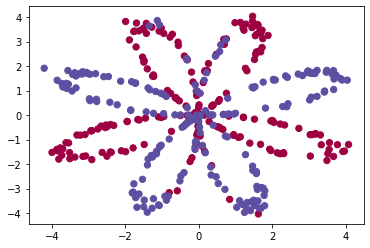

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## 3.1 Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section 2.1 here, train it and then display the results. 

epoch[0] = 0.09728818
epoch[10] = 0.09934957
epoch[20] = 0.09935608
epoch[30] = 0.09934657
epoch[40] = 0.09928731
epoch[50] = 0.09902272
epoch[60] = 0.09841333
epoch[70] = 0.09775841
epoch[80] = 0.09687968
epoch[90] = 0.09544957
epoch[100] = 0.09409852
epoch[110] = 0.09314475
epoch[120] = 0.09251674
epoch[130] = 0.09208798
epoch[140] = 0.09177516
epoch[150] = 0.09153274
epoch[160] = 0.09133632
epoch[170] = 0.09117214
epoch[180] = 0.09103188
epoch[190] = 0.09091009
epoch[200] = 0.09080298
epoch[210] = 0.09070779
epoch[220] = 0.09062244
epoch[230] = 0.09054531
epoch[240] = 0.09047514
epoch[250] = 0.09041092
epoch[260] = 0.09035182
epoch[270] = 0.09029717
epoch[280] = 0.09024642
epoch[290] = 0.09019910


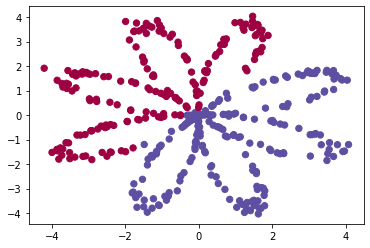

In [22]:
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.
hidden_state_size = 1; 

# Define the 2-layer network here (fill in yout code)
model = {}
model['linear1'] = nn_Linear(2, hidden_state_size)
model['sigmoid1'] = nn_Sigmoid()
model['linear2'] = nn_Linear(hidden_state_size, 1)
model['sigmoid2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):        
        xi = X[:, i:i+1].T
        yi = Y[:, i:i+1].T
        
        # Forward pass (fill in)
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)        
        loss += model['loss'].forward(a3, yi)
        
        # Backward pass (fill in)
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid2'].backward(a2, da3)
        da1 = model['linear2'].backward(a1, da2)
        da0 = model['sigmoid1'].backward(a0, da1)
        model['linear1'].backward(xi, da0)
        
        # Update gradients (fill in)
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    xi = X[:, i:i+1].T
    yi = Y[:, i:i+1].T
        
    # Forward pass (fill in)
    a0 = model['linear1'].forward(xi)
    a1 = model['sigmoid1'].forward(a0)
    a2 = model['linear2'].forward(a1)
    y_hat = model['sigmoid2'].forward(a2)        

    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);


## 3.2 Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.09246668
epoch[10] = 0.09785118
epoch[20] = 0.09783887
epoch[30] = 0.09774066
epoch[40] = 0.09731274
epoch[50] = 0.09633081
epoch[60] = 0.09536794
epoch[70] = 0.09474631
epoch[80] = 0.09403386
epoch[90] = 0.09272673
epoch[100] = 0.09080871
epoch[110] = 0.08885419
epoch[120] = 0.08711381
epoch[130] = 0.08542721
epoch[140] = 0.08325301
epoch[150] = 0.07967018
epoch[160] = 0.07419336
epoch[170] = 0.06823293
epoch[180] = 0.06316338
epoch[190] = 0.05919756
epoch[200] = 0.05615294
epoch[210] = 0.05380728
epoch[220] = 0.05197619
epoch[230] = 0.05052193
epoch[240] = 0.04934559
epoch[250] = 0.04837692
epoch[260] = 0.04756586
epoch[270] = 0.04687643
epoch[280] = 0.04628239
epoch[290] = 0.04576433


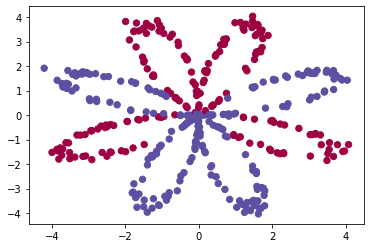

In [23]:
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.
hidden_state_size = 5; 

# Define the 2-layer network here (fill in yout code)
model = {}
model['linear1'] = nn_Linear(2, hidden_state_size)
model['sigmoid1'] = nn_Sigmoid()
model['linear2'] = nn_Linear(hidden_state_size, 1)
model['sigmoid2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):        
        xi = X[:, i:i+1].T
        yi = Y[:, i:i+1].T
        
        # Forward pass (fill in)
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)        
        loss += model['loss'].forward(a3, yi)
        
        # Backward pass (fill in)
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid2'].backward(a2, da3)
        da1 = model['linear2'].backward(a1, da2)
        da0 = model['sigmoid1'].backward(a0, da1)
        model['linear1'].backward(xi, da0)
        
        # Update gradients (fill in)
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    xi = X[:, i:i+1].T
    yi = Y[:, i:i+1].T
        
    # Forward pass (fill in)
    a0 = model['linear1'].forward(xi)
    a1 = model['sigmoid1'].forward(a0)
    a2 = model['linear2'].forward(a1)
    y_hat = model['sigmoid2'].forward(a2)        

    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);


<div style="font-size:0.8em;color:#888;text-align:center;padding-top:20px;">If you find any errors or have questions about the assignment please contact instructor at lsigal@cs.ubc.ca or post the question on Piazza. 